In [1]:
import matplotlib.pyplot as plt

from src.environment import S, actions, R, transition, A
from src.agents.qlearner import QLearner
from src.agents.friend import FriendQ

In [2]:
def plot(x, key=None, title='Q-Learner', ylab='Q-value Difference', xlab='Simulation Iteration', figname='qlearner'):
    plt.plot(x)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.ylim([0,.5])
    plt.show()
    plt.savefig('plots/{}'.format(figname))
    plt.close()

In [3]:
states = S
action_list = actions
rewards = R

In [ ]:
qlearner = QLearner(states, action_list, rewards)
err, q1 = qlearner.run(transition)

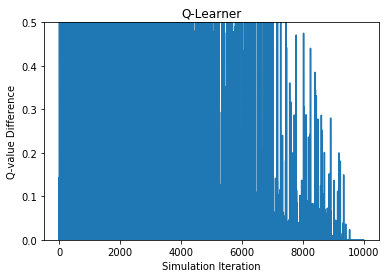

In [7]:
plot(err)

In [ ]:
e = .5 # epsilon
gamma = .99 # discount
alpha = .3 # learning rate

n_iter = 1000
friendq = FriendQ(states, action_list, rewards, eps=e, gamma=gamma, alpha=alpha, n_iterations=n_iter)
friend_err, friend_q1 = friendq.run(transition, A)

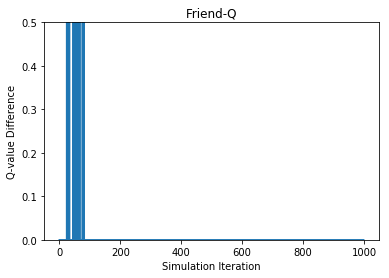

In [5]:
plot(friend_err, title='Friend-Q', figname='friendq')